#SUPERVISED LEARNING

##Regression

**Step 1: Import Necessary Libraries and Load Data**


we'll use the built-in diabetes dataset, which is a common dataset for regression tasks. It contains ten baseline variables, such as age, sex, BMI, average blood pressure, and six blood serum measurements for 442 diabetes patients.

In [41]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
X = diabetes.data  # Features
y = diabetes.target  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

**Step 2: Create and Train a Regression Model**

Next, we create a regression model, in this case, a Linear Regression model, and train it on our training data.


In [43]:
# Create a linear regression model
regression_model = LinearRegression()

# Train the model on the training data
regression_model.fit(X_train, y_train)


LinearRegression()

**Step 3: Make Predictions and Evaluate the Model**

After training the model, you can make predictions on the test data and evaluate the model's performance using metrics like Mean Squared Error (MSE) and R-squared (R2).

In [44]:
# Make predictions on the test data
y_pred = regression_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error: 2900.193628493482
R-squared (R2) Score: 0.4526027629719195


###**Visualising results**

**1. Scatterplot of Actual vs. Predicted Values:**

You can create a scatterplot to visualize how well your model's predictions match the actual values. This helps you assess the goodness of fit.

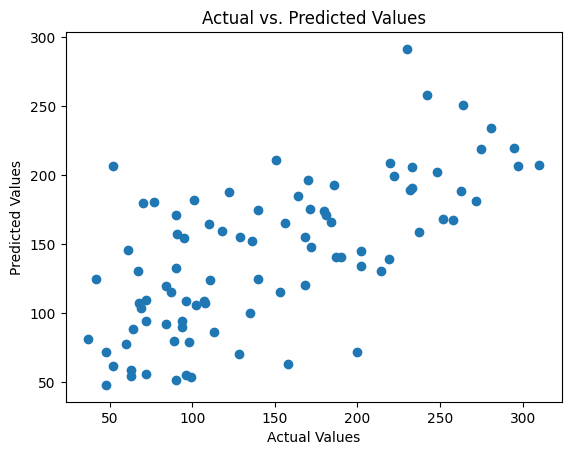

In [45]:
import matplotlib.pyplot as plt

# Scatterplot of actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


**2. Residual Plot:**
A residual plot helps you check for the presence of patterns or heteroscedasticity in the residuals (the differences between actual and predicted values). Ideally, residuals should be randomly distributed around zero.

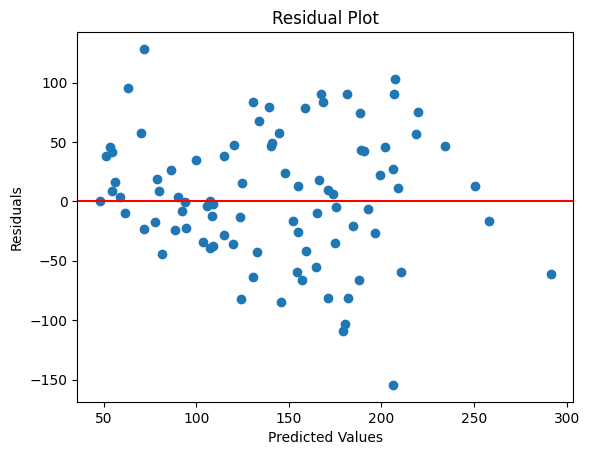

In [46]:
# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


**4. Feature Importance (Coefficients) Plot:**

If you're using a linear regression model, you can visualize the coefficients of the features to understand their impact on the target variable.

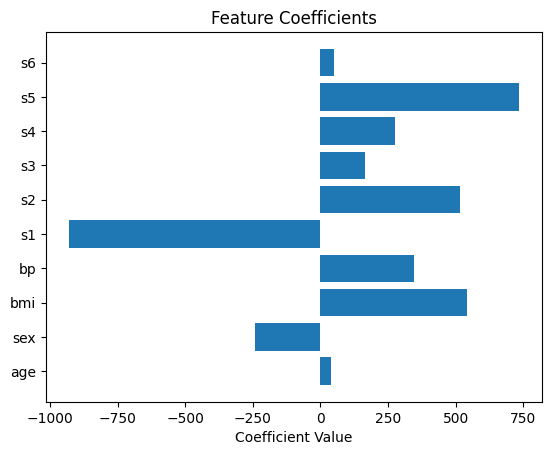

In [47]:
# Feature coefficients (if using linear regression)
coefficients = regression_model.coef_
feature_names = diabetes.feature_names
plt.barh(feature_names, coefficients)
plt.xlabel("Coefficient Value")
plt.title("Feature Coefficients")
plt.show()


##Classification
 In this case, we will perform classification using a Random Forest Classifier

 let's apply model optimization, hyperparameter tuning, and cross-validation to the diabetes dataset, which we previously loaded for regression.

**1. Data Preparation**

We import necessary libraries and load the diabetes dataset from scikit-learn.
The target variable y is transformed to a binary classification problem by checking if it's greater than 150. This means we are trying to predict whether the diabetes indicator is above 150 or not (binary classification).

In [48]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = (diabetes.target > 150).astype(int)  # Convert to binary classification problem


**2. Data Splitting**

We split the dataset into training and testing sets using train_test_split. 80% of the data is used for training, and 20% for testing. The random_state parameter ensures reproducibility.

In [49]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**3. Hyperparameter Tuning with GridSearchCV:**

We define a parameter grid to search through different hyperparameters for the Random Forest Classifier. In this case, we explore n_estimators and max_depth.

GridSearchCV is used to create a grid search object with cross-validation (cv=5).

The grid search is fit to the training data to find the best hyperparameters.
We print the best hyperparameters found by the grid search.

In [50]:
# Define hyperparameters to search
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
}

# Create the grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 10, 'n_estimators': 50}


**4. Model Training and Testing:**

We create a Random Forest Classifier with the best hyperparameters found by GridSearchCV.

The model is trained on the training data.

Predictions are made on the test data.

Model accuracy is evaluated using the accuracy_score function from scikit-learn.


In [51]:
# Train the model with the best hyperparameters
best_model = RandomForestClassifier(random_state=42, **best_params)
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)

Accuracy on Test Set: 0.7640449438202247


#UNSUPERVISED LEARNING

Problem Statement:

You are tasked with analyzing customer behavior for an e-commerce website. The goal is to segment customers into distinct groups based on their purchasing behavior to tailor marketing strategies and improve customer satisfaction.

This code generates sample customer data, applies K-Means clustering to segment customers, and creates scatter plots to visualize how customers are grouped into clusters based on their purchasing behavior.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate sample customer data (you can replace this with your dataset)
data = {
    'CustomerID': range(1, 101),
    'TotalPurchaseAmount': np.random.randint(100, 10000, size=100),
    'AvgPurchaseFrequency': np.random.randint(7, 60, size=100),
    'NumItemsPurchased': np.random.randint(1, 30, size=100)
}

# Create a DataFrame from the sample data
df = pd.DataFrame(data)


In [53]:
df.head()

,CustomerID,TotalPurchaseAmount,AvgPurchaseFrequency,NumItemsPurchased
0,1,1236,16,24
1,2,142,24,6
2,3,6434,8,3
3,4,9817,13,28
4,5,7857,49,22


In [54]:
# Select features for clustering
X = df[['TotalPurchaseAmount', 'AvgPurchaseFrequency', 'NumItemsPurchased']]

# Perform K-Means clustering (for this example, we'll use 4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


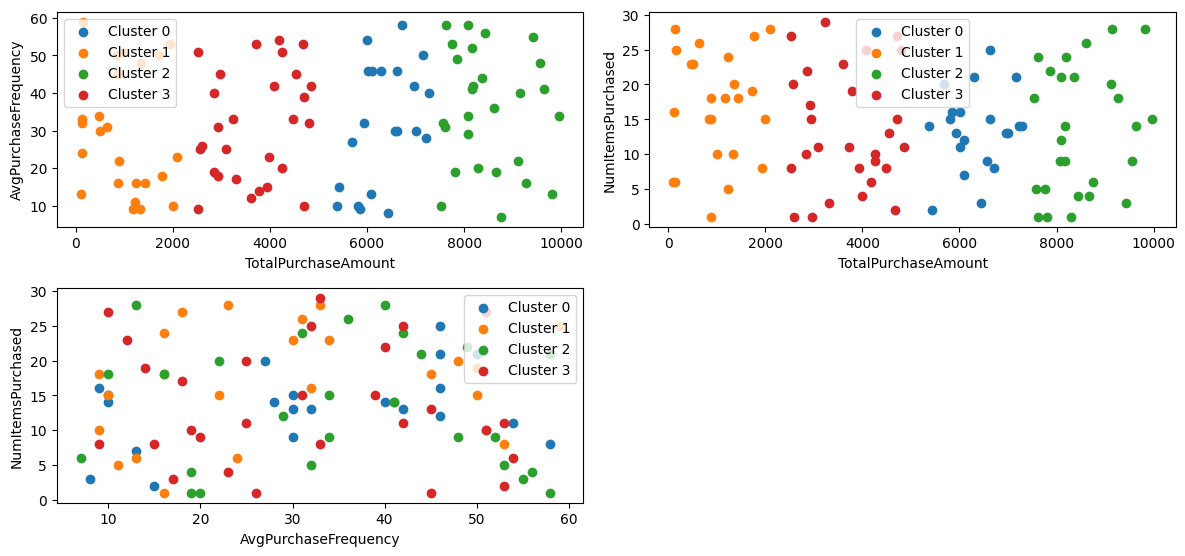

In [55]:
# Visualize the clusters
plt.figure(figsize=(12, 8))

# Create scatter plots for each pair of features
for i in range(3):
    for j in range(i+1, 3):
        plt.subplot(3, 2, (i*2)+(j-i))
        for cluster in range(4):
            cluster_data = df[df['Cluster'] == cluster]
            plt.scatter(cluster_data.iloc[:, i+1], cluster_data.iloc[:, j+1], label=f'Cluster {cluster}')
        plt.xlabel(X.columns[i])
        plt.ylabel(X.columns[j])
        plt.legend()

plt.tight_layout()
plt.show()
